Use the De Casteljau algorithm with SLERP on 4 given rotations.

In [1]:
from IPython.display import HTML

In [2]:
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt

In [3]:
from unit_quaternion import UnitQuaternion, slerp

In [4]:
from helper import angles2quat, plot_rotations, animate_rotations

In [5]:
def de_casteljau(q0, q1, q2, q3, t):
    slerp_1_2 = slerp(q1, q2, t)
    return slerp(
        slerp(
            slerp(q0, q1, t),
            slerp_1_2,
            t
        ),
        slerp(
            slerp_1_2,
            slerp(q2, q3, t),
            t
        ),
        t
    )

In [6]:
q0 = angles2quat(0, 45, -20)
q1 = angles2quat(-135, 0, 0)
q2 = angles2quat(-90, 45, 20)
q3 = angles2quat(0, -45, -20)

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
times = np.linspace(0, 1, 9)

In [9]:
casteljau_rotations = [
    de_casteljau(q0, q1, q2, q3, t)
    for t in times
]

In [10]:
slerp_rotations = [
    slerp(q0, q3, t)
    for t in times
]

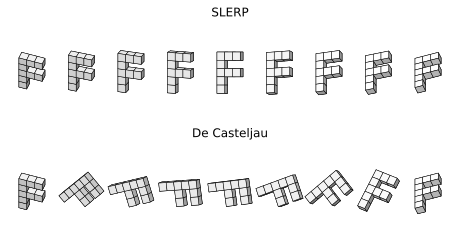

In [11]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(8, 4), subplot_kw=dict(projection='dumb3d'))
ax1.set_title('SLERP')
plot_rotations(slerp_rotations, ax=ax1)
ax2.set_title('De Casteljau')
plot_rotations(casteljau_rotations, ax=ax2);

In [12]:
times = np.linspace(0, 1, 100)

In [13]:
ani = animate_rotations({
    'Slerp': [slerp(q0, q3, t) for t in times],
    'De Casteljau': [de_casteljau(q0, q1, q2, q3, t) for t in times],
}, figsize=(6, 3), interval=30)

display(HTML(ani.to_jshtml(default_mode='once')))